In [1]:
import pandas as pd

In [2]:
def fill_missing_values(data):
    # Lặp qua từng cột trong DataFrame
    for column in data.columns:
        if data[column].dtype == 'object':
            # Điền các giá trị bị thiếu cho trường rời rạc bằng phương pháp tần số cao nhất
            data[column].fillna(data[column].value_counts().idxmax(), inplace=True)
        else:
            # Điền các giá trị bị thiếu cho trường số bằng phương pháp trung bình
            data[column].fillna(round(data[column].mean(), 2), inplace=True)

    return data

# Đọc dữ liệu từ file CSV
data = pd.read_csv('countries.csv')

# Điền các giá trị bị thiếu
filled_data = fill_missing_values(data)

# In dữ liệu sau khi điền giá trị bị thiếu
display(filled_data)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [3]:
import folium

data=filled_data

# Khởi tạo bản đồ
map = folium.Map(location=[0, 0], zoom_start=2)

# Thêm điểm đánh dấu cho mỗi quốc gia
for index, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['country']).add_to(map)

# Hiển thị bản đồ
map


c:\Users\84395\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


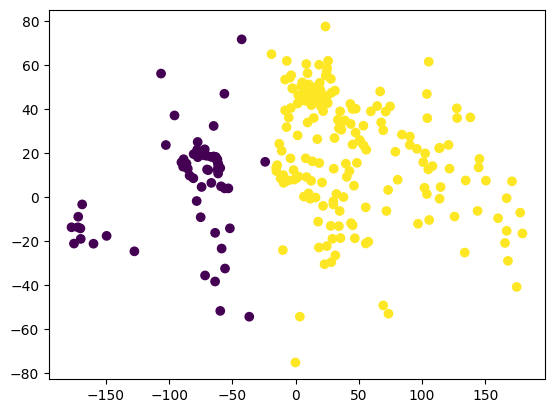

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
data = filled_data

# Chọn các thuộc tính đầu vào (features)
X = data[['latitude', 'longitude']]
# Khởi tạo mô hình K-Means với k = 3
kmeans = KMeans(n_clusters=2)

# Huấn luyện mô hình với dữ liệu đầu vào
kmeans.fit(X)

# Dự đoán nhãn cụm cho mỗi điểm dữ liệu
y_pred = kmeans.predict(X)
data['Cluster'] = y_pred
# Vẽ biểu đồ tán xạ với màu sắc theo nhãn cụm
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'])

# Hiển thị biểu đồ
plt.show()


### Nhận xét: Ở đây em thấy 2 phần latitude và phần longitude đã được phân chia ra 2 nửa của biểu đồ. Latitude tượng trưng cho màu vàng, còn longitude tượng trưng cho màu tím. ở đây có 1 chấm dữ liệu của latitude ở gần biên với longitude. Nói chung em phân cụm dữ liệu bằng thuật toán Kmeans tỷ lệ tốt khá cao.

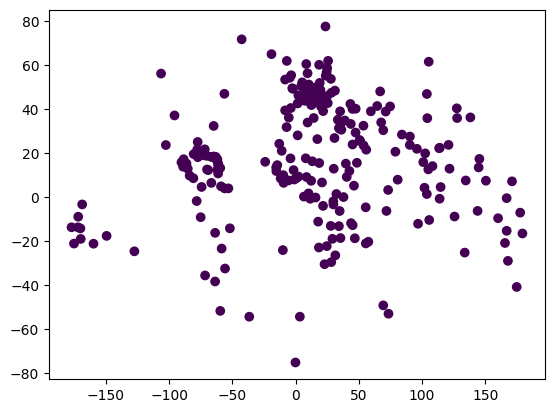

In [6]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Đọc dữ liệu từ file csv
data = filled_data

# Chọn các thuộc tính đầu vào (features)
X = data[['latitude', 'longitude']]

# Khởi tạo mô hình DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Dự đoán nhãn cụm cho mỗi điểm dữ liệu
y_pred = dbscan.fit_predict(X)
data['Cluster'] = y_pred
# Vẽ biểu đồ tán xạ với màu sắc theo nhãn cụm
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'])

# Hiển thị biểu đồ
plt.show()


### Nhận xét: Thuật toán Cluster này chưa hiển thị được dữ liệu phân cụm của longgitude